In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score



In [1]:
data={
    "x":[0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9],
    "y":[0,0,0,0,1,1,1,1]
}
data

{'x': [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9], 'y': [0, 0, 0, 0, 1, 1, 1, 1]}

## Finding m

$$\frac{(n*\sum_{i=0}^{n}Xi+Yi- \sum_{i-n}^{n}X*\sum_{i-n}^{n}Y)}{(n*\sum_{i-0}^{n}X^2)-( \sum_{i-0}^{n}X)^2}$$

In [4]:
df=pd.DataFrame(data=data)
df

df['sum_xy']=df['x']*df['y']
df['sqr_x']=df['x']**2
df

,x,y,sum_xy,sqr_x
0,0.1,0,0.0,0.01
1,0.2,0,0.0,0.04
2,0.3,0,0.0,0.09
3,0.4,0,0.0,0.16
4,0.6,1,0.6,0.36
5,0.7,1,0.7,0.49
6,0.8,1,0.8,0.64
7,0.9,1,0.9,0.81


In [12]:
sum_x=df['x'].sum()
sum_y=df['y'].sum()
sum_xy=df['sum_xy'].sum()
sum_sqr_x=df['sqr_x'].sum()
sum_x_h_2=sum_x **2
n=len(df)
sum_x,sum_y,sum_xy,sum_sqr_x,sum_x_h_2,n


(4.0, 4, 3.0, 2.5999999999999996, 16.0, 8)

In [9]:
numerator = (n*sum_xy) - (sum_x*sum_y)
numerator

8.0

In [13]:
denominator = (n*sum_sqr_x) - sum_x_h_2
denominator

4.799999999999997

In [14]:
m=numerator/denominator
m

1.6666666666666676

## finding b

$$\frac{\sum_{i=0}^{n}Y_{i}-m*\sum_{i=0}^{n}X_{i}}{n}$$

In [15]:
sum_x,sum_y,n,m

(4.0, 4, 8, 1.6666666666666676)

In [17]:
numerator_b = ((sum_y)-(m*sum_x))
denominator_b=n
b=numerator_b/denominator_b
b

-0.3333333333333338

In [18]:
print('m value is:',m)
print('b value is:',b)

m value is: 1.6666666666666676
b value is: -0.3333333333333338


## X-Cap

$$Xcap=m*X+c$$

In [20]:
x_cap = [(m*x+b) for x in df['x']]
x_cap

[-0.16666666666666705,
 -2.7755575615628914e-16,
 0.1666666666666664,
 0.33333333333333326,
 0.6666666666666666,
 0.8333333333333334,
 1.0000000000000004,
 1.166666666666667]

## Sigmoid

$$Y_{pred}=\frac{1}{1+e^{-x^{cap}}}$$

In [21]:
def sigmoid(x_cap):
    return [(1/(1+np.exp(-x_cap))) for x_cap in x_cap]
sigmoid(x_cap)

[0.45842951678320004,
 0.5,
 0.5415704832167998,
 0.5825702064623147,
 0.6607563687658172,
 0.6970592839654074,
 0.731058578630005,
 0.7625419716560975]

In [24]:
ypred = sigmoid(x_cap)
ypred

[0.45842951678320004,
 0.5,
 0.5415704832167998,
 0.5825702064623147,
 0.6607563687658172,
 0.6970592839654074,
 0.731058578630005,
 0.7625419716560975]

In [23]:
def final(ypred):
    re = [1 if val >=0.5 else 0 for val in ypred]
    return re
final(ypred)

[0, 1, 1, 1, 1, 1, 1, 1]

In [25]:
ypred=final(ypred)
ypred

[0, 1, 1, 1, 1, 1, 1, 1]

In [26]:
ytrue = df.y.values
ytrue

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [30]:
def acc(ypred,ytrue):
    c=0
    for yp,yt in zip(ypred,ytrue):
        if yp==yt:
            c+=1
    return c/len(ypred)
acc(ypred, ytrue)

from sklearn.metrics import accuracy_score
accuracy_score(ytrue,ypred)

0.625

In [32]:
!pip install scikit.learn
import sklearn

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytrue,ypred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



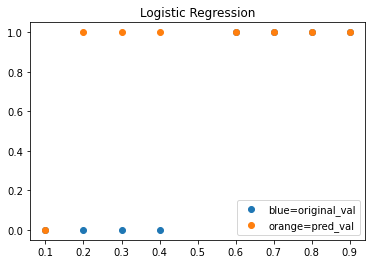

In [39]:
x_val = df['x']
ytrue = df['y']
y_pre = ypred

plt.scatter(x_val,ytrue,label='blue=original_val')
plt.scatter(x_val,ypred,label='orange=pred_val')
plt.title("Logistic Regression")
plt.legend()
plt.show()